In [2]:
# Data Importing and Frequency Counting
import pandas as pd
import numpy as np

data = pd.read_excel('StockX-Data-Contest-2019-3.xlsx', sheet_name = 1, header = 0)

In [2]:
len(data.index)

99956

In [3]:
data['Net Profit'] = data['Sale Price'] - data['Retail Price']

In [4]:
freq = data.groupby('Sneaker Name').count()
freq = freq.sort_values(by = 'Brand',ascending = False)
std_group =  data.groupby('Sneaker Name').std()
mean_group = data.groupby('Sneaker Name').mean()

In [22]:
std_netpro_dict = dict(zip(std_group.index, std_group['Net Profit']))
mean_netpro_dict = dict(zip(std_group.index, mean_group['Net Profit']))

In [23]:
sorted_netpro_std = [std_netpro_dict[name] for name in sorted_rank_name]
sorted_netpro_mean = [mean_netpro_dict[name] for name in sorted_rank_name]

In [8]:
# Create a matrix recording the degrees of transactions each model
shoes = data['Sneaker Name'].unique()
nbshoes = len(shoes)
deg = np.zeros((nbshoes,nbshoes))
shoes_code = dict(zip(list(shoes),list(range(nbshoes))))

In [9]:
shoes_code

{'Adidas-Yeezy-Boost-350-Low-V2-Beluga': 0,
 'Adidas-Yeezy-Boost-350-V2-Core-Black-Copper': 1,
 'Adidas-Yeezy-Boost-350-V2-Core-Black-Green': 2,
 'Adidas-Yeezy-Boost-350-V2-Core-Black-Red': 3,
 'Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017': 4,
 'Adidas-Yeezy-Boost-350-V2-Core-Black-White': 5,
 'Adidas-Yeezy-Boost-350-V2-Cream-White': 6,
 'Adidas-Yeezy-Boost-350-V2-Zebra': 7,
 'Adidas-Yeezy-Boost-350-Low-Moonrock': 8,
 'Nike-Air-Max-90-Off-White': 9,
 'Nike-Air-Presto-Off-White': 10,
 'Nike-Air-VaporMax-Off-White': 11,
 'Air-Jordan-1-Retro-High-Off-White-Chicago': 12,
 'Nike-Blazer-Mid-Off-White': 13,
 'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016': 14,
 'Adidas-Yeezy-Boost-350-Low-Oxford-Tan': 15,
 'Adidas-Yeezy-Boost-350-Low-Turtledove': 16,
 'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015': 17,
 'Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow': 18,
 'Nike-Air-Force-1-Low-Off-White': 19,
 'Nike-Air-Max-97-Off-White': 20,
 'Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100': 21,
 'Nike-R

In [10]:
i = 0
M = np.zeros((nbshoes,nbshoes))
# rows: current one, columns: next one
# for example: 1,2 means how many times there is a purchase of 2 followed by 1
current = shoes_code[data.iloc[0]['Sneaker Name']]
for i in range(len(data.index)):
    try:
        nextone = shoes_code[data.iloc[i+1]['Sneaker Name']]
        # link from current to nextone += 1
        M[current,nextone] += 1.0
        current = nextone
    except IndexError as e:
        break

In [11]:
print(M[0,:])

[112.  17.   9.  14.  15.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 331.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.]


In [12]:
M_edge = np.count_nonzero(M, axis = 1)
M_edge
# degree A = 18, degree B = 8 ...

array([ 6,  4,  5,  4,  3,  2,  4, 12,  9, 13, 11, 13, 10, 15,  7,  7,  3,
        6,  3, 15, 11,  4, 13, 11,  6,  7,  7, 11, 13, 11,  4,  4,  5,  6,
        9,  4,  2,  8,  2,  6,  3,  4,  2,  2,  5,  4,  6,  8,  6,  6])

In [14]:
# define P
p = np.zeros((nbshoes,nbshoes))
for i in range(nbshoes):
    for j in range(nbshoes):
        if M[j,i] != 0:
            p[i,j] = 1/M_edge[j]
        if M[j,i] == 0:
            p[i,j] = 0
print(p[:,0])

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.16666667 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


In [21]:
# where is the most frequent?
find = np.where(M == np.amax(M))
for k,v in shoes_code.items():
    if v == find:
        print(k)

In [15]:
np.sum(p[:,0])

0.9999999999999999

In [23]:
# count how many unique shoes one shoes can lead to
# deg_edge = np.count_nonzero(deg, axis = 0)

In [24]:
# # define P
# p = np.zeros((nbshoes,nbshoes))
# for i in range(nbshoes):
#     for j in range(nbshoes):
#         if deg[i,j] != 0:
#             p[i,j] = 1/deg[i,j]
#         else:
# #             p[i,j] = 0

In [16]:
np.sum(p,axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [17]:
# define g
g = np.zeros((nbshoes,nbshoes))
alpha = 0.85
g = np.add(alpha*p, ((1-alpha)/nbshoes)*np.ones((nbshoes,nbshoes)))

In [18]:
# find invariant measure of g
x0 = np.random.rand(50,1)
g_new = np.matmul(g,g)
nruns = 500

for time in range(nruns):
    g_new = np.matmul(g,g_new)

mu = np.matmul(g_new,x0)

In [19]:
mu_transpose = mu.transpose()
mu_transpose[0]

array([1.12662576, 0.73663865, 0.92876726, 1.22598287, 1.5447205 ,
       1.69274858, 2.19188284, 1.43781413, 0.51130062, 0.38298306,
       0.57922619, 0.51019878, 0.20393509, 0.41053813, 0.58061109,
       0.37137309, 0.74930984, 0.51010831, 0.76818215, 0.25391015,
       0.42020861, 0.17141165, 0.3182114 , 0.39320349, 1.06119923,
       0.26758439, 0.67690509, 0.23952191, 0.39722334, 0.2210134 ,
       0.68645137, 0.44099664, 0.24416461, 0.25736014, 0.49543018,
       0.39944696, 0.37597771, 0.27361786, 1.33596896, 0.13261438,
       0.4876352 , 0.38217121, 0.45525521, 0.48389375, 0.18382872,
       0.17108635, 0.15325756, 0.11912384, 0.16432721, 0.12586617])

In [20]:
rank = dict(zip(mu_transpose[0], shoes_code.keys()))

<Figure size 7200x720 with 0 Axes>

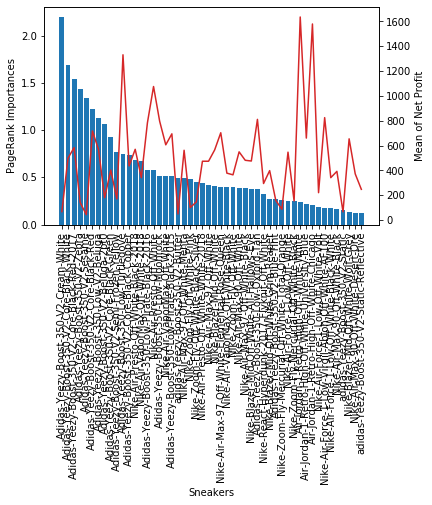

In [41]:
sorted_rank = sorted(rank.keys(),reverse = True)
sorted_rank_name = [rank[i] for i in sorted_rank]
sorted_rank_shoe_code = [shoes_code[j] for j in sorted_rank_name]
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(100,10))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Sneakers')
ax1.set_ylabel('PageRank Importances')
ax1.bar(height = sorted_rank, x = sorted_rank_name)
plt.xticks(ticks = sorted_rank_name, rotation = 90)

# instantiate a second axes
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Mean of Net Profit')
ax2.plot(sorted_rank_name, sorted_netpro_mean, color = color2)
plt.show()

<Figure size 1440x360 with 0 Axes>

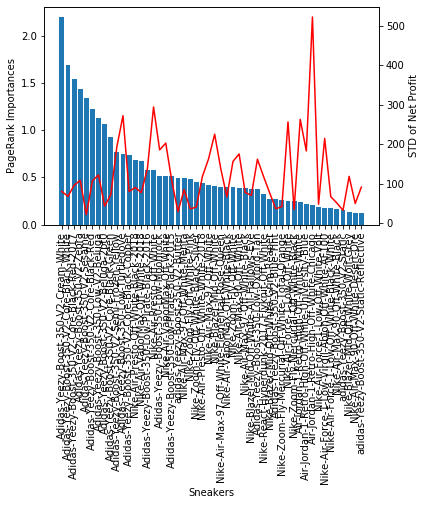

In [42]:
fig3 = plt.figure(figsize=(20,5))
fig3, ax1_var = plt.subplots()
ax1_var.set_xlabel('Sneakers')
ax1_var.set_ylabel('PageRank Importances')
ax1_var.bar(height = sorted_rank, x = sorted_rank_name)
plt.xticks(ticks = sorted_rank_name, rotation = 90)

ax2_var = ax1_var.twinx()
ax2_var.set_ylabel('STD of Net Profit')
ax2_var.plot(sorted_rank_name, sorted_netpro_std, color = 'red')
plt.show()

<Figure size 1440x360 with 0 Axes>

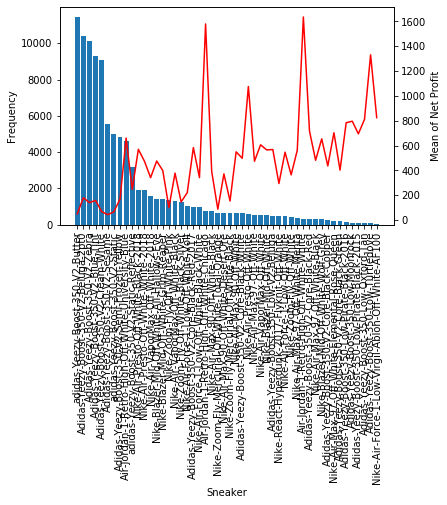

In [43]:
freq_dict = dict(zip(freq.index, freq['Brand']))
sorted_mean_profit_freq = [mean_netpro_dict[name] for name in list(freq_dict.keys())]

fig2 = plt.figure(figsize=(20,5))
fig2, ax1_freq = plt.subplots()
ax1_freq.set_xlabel('Sneaker')
ax1_freq.set_ylabel('Frequency')
ax1_freq.bar(height = list(freq_dict.values()), x = list(freq_dict.keys()))
plt.xticks(ticks = list(freq_dict.keys()), rotation = 90)
ax2_freq = ax1_freq.twinx()
ax2_freq.set_ylabel('Mean of Net Profit')
ax2_freq.plot(list(freq_dict.keys()), sorted_mean_profit_freq, color = 'red')
plt.show()

In [ ]:
freq_dict = dict(zip(freq.index, freq['Brand']))
sorted_std_profit_freq = [std_netpro_dict[name] for name in list(freq_dict.keys())]

fig3 = plt.figure(figsize=(20,5))
fig3, ax1_freq = plt.subplots()
ax1_freq.set_xlabel('Sneaker')
ax1_freq.set_ylabel('Frequency')
ax1_freq.bar(height = list(freq_dict.values()), x = list(freq_dict.keys()))
plt.xticks(ticks = list(freq_dict.keys()), rotation = 90)
ax2_freq_std = ax1_freq.twinx()
ax2_freq_std.set_ylabel('STD of Net Profit')
ax2_freq_std.plot(list(freq_dict.keys()), sorted_std_profit_freq, color = 'red')
plt.show()

<Figure size 1440x360 with 0 Axes>

In [83]:
ranking = list(range(1,51))

In [84]:
np.corrcoef(ranking, sorted_netpro_mean)

array([[1.        , 0.07158131],
       [0.07158131, 1.        ]])

In [87]:
np.corrcoef(ranking,sorted_std_profit_freq)

array([[1.        , 0.35661844],
       [0.35661844, 1.        ]])